In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## ECG Display Project

In this notebook, we load a 3-lead ECG recording, convert the signals to standard units (mV), 
and plot them both as simple time series and in a "paper-style" format similar to clinical ECGs.


# ECG Data Display Project

We work with raw ECG signals (3 leads, 1000 Hz sampling).  
The steps are decomposed into clear functions, each addressing a subproblem:
1. Load the data (`load_ecg_file`)
2. Convert to millivolts (`convert_to_mv`)
3. Create the time vector (`create_time_vector`)
4. Plot in clinical style (`plot_ecg_paper_style`)

This decomposition avoids repetition, makes the workflow clearer, and allows easy adaptation (e.g., if the sampling rate changes).


In [ ]:
# Functions list

def load_ecg_file(path):
    """Load ECG file as NumPy array"""
    return np.loadtxt(path)

def convert_to_mv(ecg_signal_uv):
    """Convert ECG signal from microvolts (µV) to millivolts (mV)."""
    return ecg_signal_uv / 1000.0

def create_time_vector(n_samples, fs=1000):
    """Create a time vector in seconds given number of samples and sampling rate."""
    return np.arange(n_samples) / fs

def plot_ecg_paper_style(ecg_data, time_data, label="ECG"):
    """Plot an ECG lead with ECG-paper style."""
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.plot(time_data, ecg_data, color='blue', linewidth=1, label=label)

    # Pink ECG paper style
    ax.set_facecolor("#ffe6e6")
    duration = int(np.ceil(time_data[-1]))
    ax.set_xticks(np.arange(0, duration+1, 0.2))
    ax.set_xticks(np.arange(0, duration+1, 0.04), minor=True)
    ax.set_yticks(np.arange(-1.5, 2.0, 0.5))
    ax.set_yticks(np.arange(-1.5, 2.0, 0.1), minor=True)
    ax.grid(which='major', color='red', linewidth=0.6)
    ax.grid(which='minor', color='red', linestyle=':', linewidth=0.3)

    ax.set_xlim(0, duration)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xticklabels([]); ax.set_yticklabels([])
    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.set_title(label, pad=18, fontsize=13, weight='bold')

    # Footer annotations (for style only, placeholder)
    fig.text(0.02, 0.01, "LOC 0000-000", fontsize=9, color='blue')
    fig.text(0.2, 0.01, "Speed: 25 mm/s   Gain: 10 mm/mV", fontsize=9, color='blue')
    fig.text(0.55, 0.01, "Filter: 0.15–150 Hz", fontsize=9, color='blue')
    fig.text(0.9, 0.01, "ID: 16405", fontsize=9, ha='right', color='blue')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


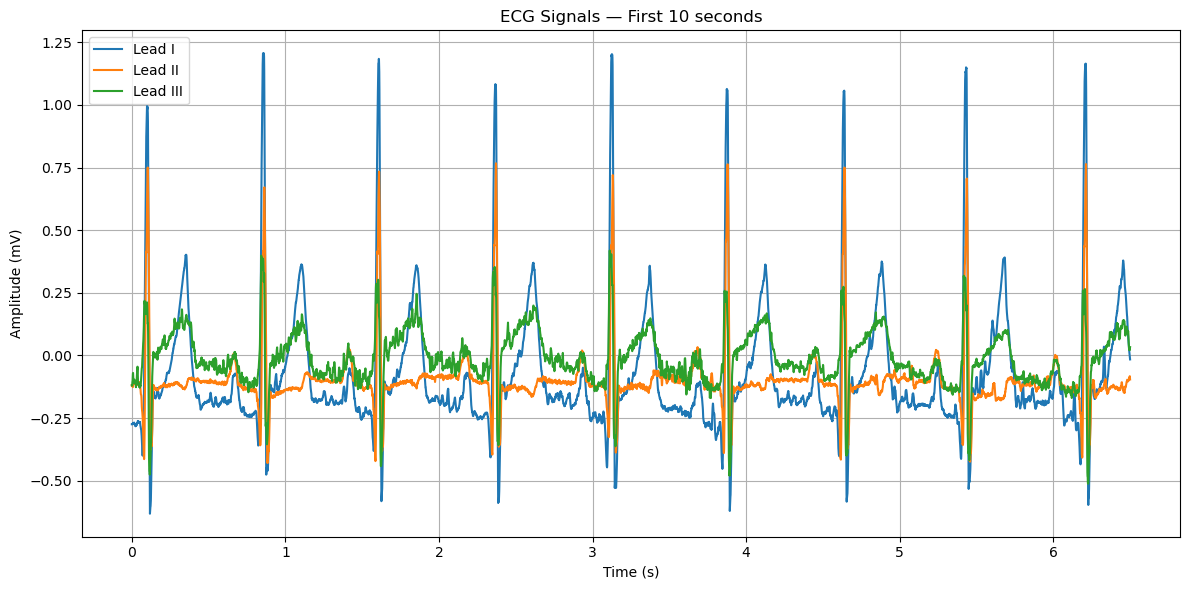

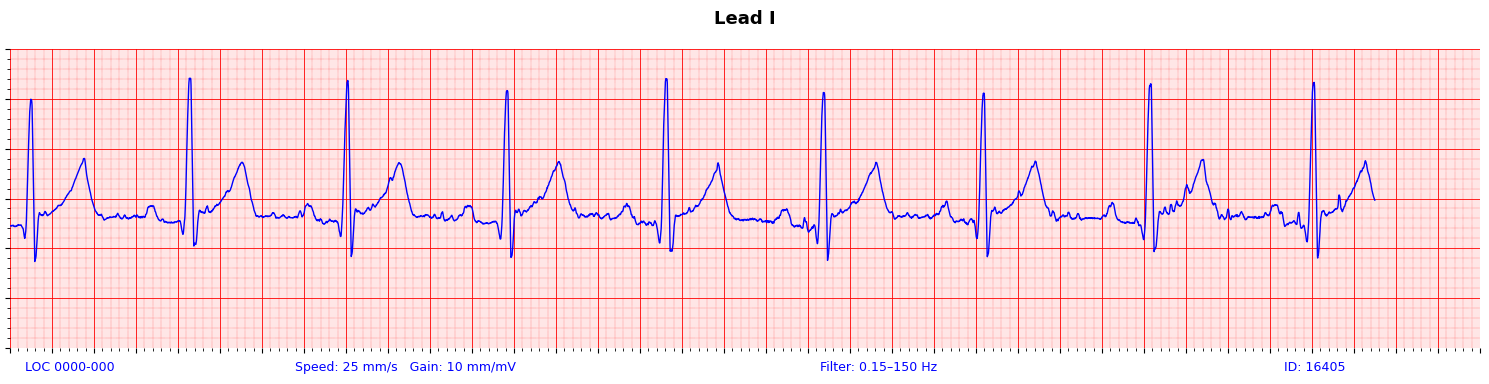

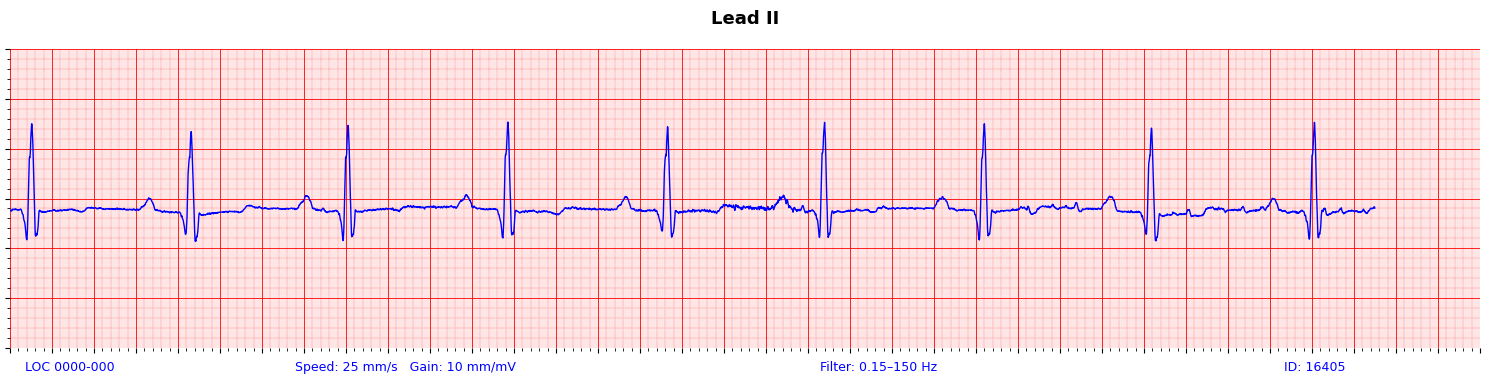

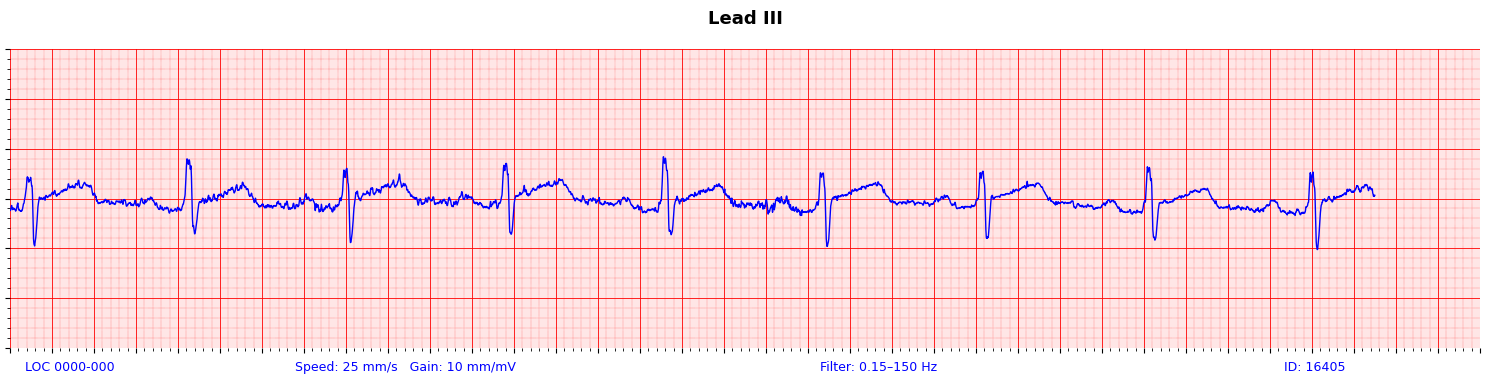

In [ ]:
# Load ECG file (already in µV, in this case ! /!\  otherwise convert)
ECG = load_ecg_file("../data/ecgu.txt")

# Split leads
lead_I_raw   = ECG[:, 0]
lead_II_raw  = ECG[:, 1]
lead_III_raw = ECG[:, 2]

# Convert to mV
lead_I_mv   = convert_to_mv(lead_I_raw)
lead_II_mv  = convert_to_mv(lead_II_raw)
lead_III_mv = convert_to_mv(lead_III_raw)

# Create time vector
fs = 1000
time = create_time_vector(len(lead_I_mv), fs)

# Simple inline plot for quick overview 
N = int(10 * fs)
plt.figure(figsize=(12, 6))
plt.plot(time[:N], lead_I_mv[:N], label="Lead I")
plt.plot(time[:N], lead_II_mv[:N], label="Lead II")
plt.plot(time[:N], lead_III_mv[:N], label="Lead III")
plt.title("ECG Signals — First 10 seconds")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#  ECG-paper style plots (first 10s of each lead) 
plot_ecg_paper_style(lead_I_mv[:10000], time[:10000], label="Lead I")
plot_ecg_paper_style(lead_II_mv[:10000], time[:10000], label="Lead II")
plot_ecg_paper_style(lead_III_mv[:10000], time[:10000], label="Lead III")

### Reflection

- The workflow was split into functions for clarity and reuse.  
- Each step corresponds to a clear need: load → convert → time axis → plot.  
- The ECG paper style provides realism, even if annotations are illustrative.  

#### References
- https://numpy.org/doc/stable/user/index.html 
- https://www.indigits.com/post/2022/10/ecg_python/ #for gridstyle plots & exemple
